# Comparing Access to Unhealthy Food vs Obesity in Adults (2016)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np

In [2]:
boundaries = gpd.read_file('Borough_Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
boundaries = boundaries.astype({'boro_code':'int64'})
boundaries.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1.623621e+09,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1,Manhattan,6.365208e+08,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,1.934143e+09,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3.041419e+09,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [3]:
data_obese_2016 = pd.read_csv('obesity-adults-2016.csv')
print(data_obese_2016.head())
data_acc_unhealthy = pd.read_csv('access-unh-food-2016.csv')
print("\n", data_acc_unhealthy.head())

   Time GeoTypeDesc  GeoID  GeoRank      Geography   Number            Percent
0  2016     Borough      2        1          Bronx  348,000  33.5 (30.3, 36.9)
1  2016     Borough      3        1       Brooklyn  498,000  25.8 (23.7, 27.9)
2  2016     Borough      1        1      Manhattan  201,000  15.4 (13.2, 17.9)
3  2016     Borough      4        1         Queens  382,000  21.3 (19.0, 23.7)
4  2016     Borough      5        1  Staten Island   94,000  26.4 (21.6, 31.8)

    Time GeoTypeDesc  GeoID  GeoRank      Geography  \
0  2016     Borough      1        1      Manhattan   
1  2016     Borough      4        1         Queens   
2  2016     Borough      5        1  Staten Island   
3  2016     Borough      2        1          Bronx   
4  2016     Borough      3        1       Brooklyn   

   Ratio Bodegas to supermarkets  
0                              9  
1                             10  
2                             12  
3                             15  
4                       

In [34]:
merged_obese_2016 = pd.merge(boundaries, data_obese_2016, left_on='boro_code', right_on='GeoID', how='right')
print(merged_obese_2016.head())
merged_acc_unhealthy = pd.merge(boundaries, data_acc_unhealthy, left_on='boro_code', right_on='GeoID', how='right')
print(merged_acc_unhealthy.head())

   boro_code      boro_name    shape_area     shape_leng  \
0          2          Bronx  1.187175e+09  463179.772813   
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Time GeoTypeDesc  GeoID  \
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  2016     Borough      2   
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  2016     Borough      3   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  2016     Borough      1   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  2016     Borough      4   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  2016     Borough      5   

   GeoRank      Geography   Number            Percent  
0        1          Bronx  348,000  33.5 (30.3, 36.9)  
1        1       Brooklyn  498,000  25.8

In [35]:
merged_obese_2016['Number'] = merged_obese_2016['Number'].str.replace(',', '').astype(float)
# merged_acc_unhealthy.plot(column='Ratio Bodegas to supermarkets', cmap=cmap, norm=norm, ax=ax, legend=True)
# cmap = plt.cm.Reds
# norm = colors.LogNorm(vmin=merged_obese_2016['Number'].min(), vmax=merged_obese_2016['Number'].max())
# fig, ax = plt.subplots(figsize=(7, 7))
# # fig, axs = plt.subplots(1, 2, figsize=(10, 7))
# merged_obese_2016.plot(column='Number', cmap=cmap, norm=norm, ax=ax, legend=True)
# ax.set_title('Obesity in Adults for the year 2016')
# plt.show()

<AxesSubplot:title={'center':'Access to unhealthy food for the year 2016'}>

<Figure size 432x288 with 0 Axes>

In [36]:
# cmap = plt.cm.Reds
# norm = colors.LogNorm(vmin=merged_acc_unhealthy['Ratio Bodegas to supermarkets'].min(), vmax=merged_acc_unhealthy['Ratio Bodegas to supermarkets'].max())
# fig, ax = plt.subplots(figsize=(7, 7))
# # fig, axs = plt.subplots(1, 2, figsize=(10, 7))
# ax.set_title('Access to unhealthy food for the year 2016')
# plt.show()

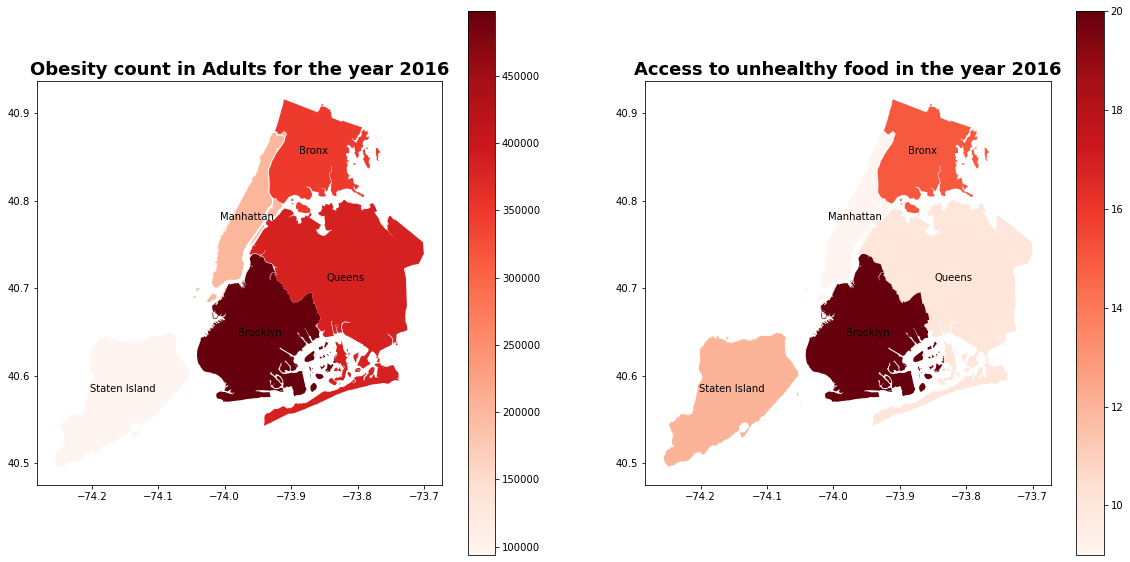

In [119]:
cmap1 = 'Reds'
norm1 = plt.Normalize(vmin=merged_obese_2016['Number'].min(), vmax=merged_obese_2016['Number'].max())

cmap2 = 'Reds'
norm2 = plt.Normalize(vmin=merged_acc_unhealthy['Ratio Bodegas to supermarkets'].min(), vmax=merged_acc_unhealthy['Ratio Bodegas to supermarkets'].max())

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

merged_obese_2016.plot(column='Number', cmap=cmap1, norm=norm1, ax=axs[0], legend=True)
axs[0].set_title('Obesity count in Adults for the year 2016', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[0].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

merged_acc_unhealthy.plot(column='Ratio Bodegas to supermarkets', cmap=cmap2, norm=norm2, ax=axs[1], legend=True)
axs[1].set_title('Access to unhealthy food in the year 2016', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[1].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

plt.show()

# Obesity in Adults vs Sugary drink consumption (2020)

In [101]:
data_obese_2020 = pd.read_csv('obesity-adults-2020.csv')
print(data_obese_2020.head())
data_sugar_dnk_consm_2020 = pd.read_csv('Sugary-drink-consumption-2020.csv')
print("\n", data_sugar_dnk_consm_2020.head())

   Time GeoTypeDesc  GeoID  GeoRank      Geography   Number            Percent
0  2020     Borough      2        1          Bronx  332,000  32.9 (29.5, 36.4)
1  2020     Borough      3        1       Brooklyn  479,000  25.3 (23.0, 27.8)
2  2020     Borough      1        1      Manhattan  227,000  17.5 (15.1, 20.1)
3  2020     Borough      4        1         Queens  435,000  25.5 (22.5, 28.6)
4  2020     Borough      5        1  Staten Island  118,000  33.0 (27.0, 39.7)

    Time GeoTypeDesc  GeoID  GeoRank      Geography   Number            Percent
0  2020     Borough      2        1          Bronx  338,000  33.0 (29.5, 36.8)
1  2020     Borough      3        1       Brooklyn  426,000  22.0 (19.8, 24.4)
2  2020     Borough      1        1      Manhattan  232,000  17.5 (14.9, 20.4)
3  2020     Borough      4        1         Queens  361,000  20.4 (17.9, 23.2)
4  2020     Borough      5        1  Staten Island   74,000  20.4 (15.3, 26.8)


In [103]:
merged_obese_2020 = pd.merge(boundaries, data_obese_2020, left_on='boro_code', right_on='GeoID', how='right')
print(merged_obese_2020.head())
merged_sugar_dnk_consm_2020 = pd.merge(boundaries, data_sugar_dnk_consm_2020, left_on='boro_code', right_on='GeoID', how='right')
print(merged_sugar_dnk_consm_2020.head())

   boro_code      boro_name    shape_area     shape_leng  \
0          2          Bronx  1.187175e+09  463179.772813   
1          3       Brooklyn  1.934143e+09  728197.541089   
2          1      Manhattan  6.365208e+08  357564.316391   
3          4         Queens  3.041419e+09  888199.731579   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Time GeoTypeDesc  GeoID  \
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  2020     Borough      2   
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  2020     Borough      3   
2  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  2020     Borough      1   
3  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  2020     Borough      4   
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  2020     Borough      5   

   GeoRank      Geography   Number            Percent  
0        1          Bronx  332,000  32.9 (29.5, 36.4)  
1        1       Brooklyn  479,000  25.3

In [104]:
merged_obese_2020['Number'] = merged_obese_2020['Number'].str.replace(',', '').astype(float)
merged_sugar_dnk_consm_2020['Number'] = merged_sugar_dnk_consm_2020['Number'].str.replace(',', '').astype(float)

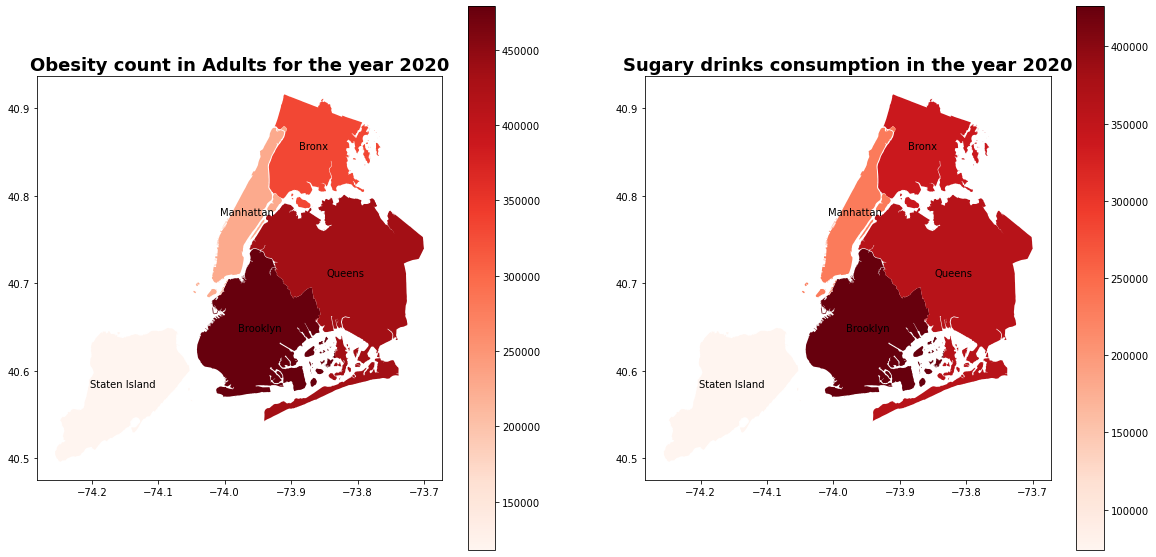

In [118]:
cmap1 = 'Reds'
norm1 = plt.Normalize(vmin=merged_obese_2020['Number'].min(), vmax=merged_obese_2020['Number'].max())

cmap2 = 'Reds'
norm2 = plt.Normalize(vmin=merged_sugar_dnk_consm_2020['Number'].min(), vmax=merged_sugar_dnk_consm_2020['Number'].max())

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

merged_obese_2020.plot(column='Number', cmap=cmap1, norm=norm1, ax=axs[0], legend=True)
axs[0].set_title('Obesity count in Adults for the year 2020', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[0].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

merged_sugar_dnk_consm_2020.plot(column='Number', cmap=cmap2, norm=norm2, ax=axs[1], legend=True)
axs[1].set_title('Sugary drinks consumption in the year 2020', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[1].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

plt.show()

# Obesity in Adults vs Covid (2020)

In [106]:
data_covid_2020 = pd.read_csv('data-by-day.csv')
data_covid_2020['date_of_interest'] = pd.to_datetime(data_covid_2020['date_of_interest'])
count_qns_2020 = data_covid_2020.loc[data_covid_2020['date_of_interest'].dt.year == 2020, 'QN_CASE_COUNT'].sum()
print("\n Queens total count for 2020: ", count_qns_2020)
count_brooklyn_2020 = data_covid_2020.loc[data_covid_2020['date_of_interest'].dt.year == 2020, 'BK_CASE_COUNT'].sum()
print("\n Brooklyn total count for 2020: ", count_brooklyn_2020)
count_bronx_2020 = data_covid_2020.loc[data_covid_2020['date_of_interest'].dt.year == 2020, 'BX_CASE_COUNT'].sum()
print("\n Bronx total count for 2020: ", count_bronx_2020)
count_mhtn_2020 = data_covid_2020.loc[data_covid_2020['date_of_interest'].dt.year == 2020, 'MN_CASE_COUNT'].sum()
print("\n Manhattan total count for 2020: ", count_mhtn_2020)
count_stn_2020 = data_covid_2020.loc[data_covid_2020['date_of_interest'].dt.year == 2020, 'SI_CASE_COUNT'].sum()
print("\n Staten Island total count for 2020: ", count_stn_2020)
all_counts = [[count_qns_2020,4], [count_brooklyn_2020,3],[count_bronx_2020,2],[count_mhtn_2020,1],[count_stn_2020,5]]


 Queens total count for 2020:  117063

 Brooklyn total count for 2020:  115636

 Bronx total count for 2020:  80527

 Manhattan total count for 2020:  55685

 Staten Island total count for 2020:  32627


In [107]:
data_counts = pd.DataFrame(all_counts, columns=['Number', 'GeoID'])
# print(data_counts)
merged_data_counts = pd.merge(boundaries, data_counts, left_on='boro_code', right_on='GeoID', how='right')
print(merged_data_counts.head())
print(type(merged_data_counts['Number']))

   boro_code      boro_name    shape_area     shape_leng  \
0          4         Queens  3.041419e+09  888199.731579   
1          3       Brooklyn  1.934143e+09  728197.541089   
2          2          Bronx  1.187175e+09  463179.772813   
3          1      Manhattan  6.365208e+08  357564.316391   
4          5  Staten Island  1.623621e+09  325917.353702   

                                            geometry  Number  GeoID  
0  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  117063      4  
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  115636      3  
2  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...   80527      2  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...   55685      1  
4  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...   32627      5  
<class 'pandas.core.series.Series'>


In [110]:
# merged_data_counts['Number'] = merged_data_counts['Number'].str.replace(',', '').astype(float)

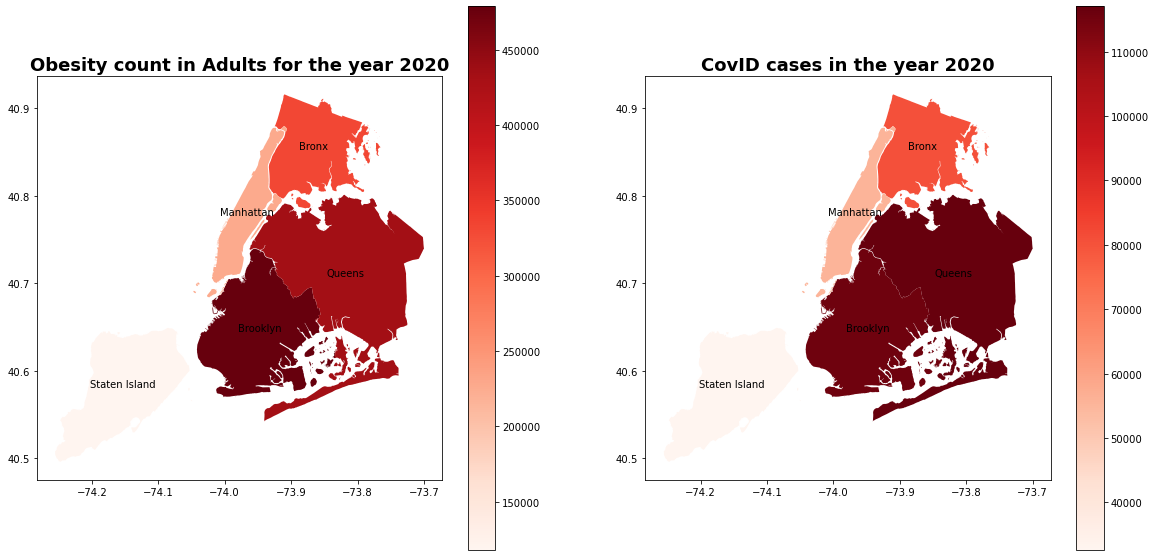

In [117]:
cmap1 = 'Reds'
norm1 = plt.Normalize(vmin=merged_obese_2020['Number'].min(), vmax=merged_obese_2020['Number'].max())

cmap2 = 'Reds'
norm2 = plt.Normalize(vmin=merged_data_counts['Number'].min(), vmax=merged_data_counts['Number'].max())

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

merged_obese_2020.plot(column='Number', cmap=cmap1, norm=norm1, ax=axs[0], legend=True)
axs[0].set_title('Obesity count in Adults for the year 2020', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[0].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

merged_data_counts.plot(column='Number', cmap=cmap2, norm=norm2, ax=axs[1], legend=True)
axs[1].set_title('CovID cases in the year 2020', fontsize=18, fontweight='bold')
for idx, row in boundaries.iterrows():
    axs[1].annotate(text=row['boro_name'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=10)

plt.show()